<a href="https://colab.research.google.com/github/Aravind-98/Summer_Internship_2020/blob/master/Index_Tracker_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))   

Saving Price_All.csv to Price_All.csv
User uploaded file "Price_All.csv" with length 1527571 bytes


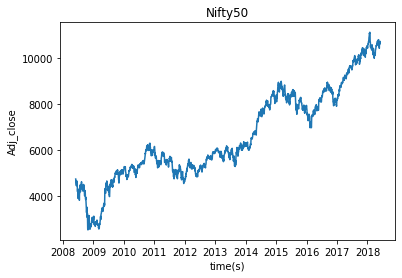

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import LSTM, Dropout, SimpleRNN, GRU, Dense, RepeatVector, TimeDistributed
from keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

df=pd.read_csv("Price_All.csv")
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
scaler=MinMaxScaler()

fig, ax = plt.subplots()
ax.plot(df["Date"],df["Price_51"])

ax.set(xlabel='time(s)', ylabel='Adj_close',
       title='Nifty50')
fig.savefig("benchmark.png")
plt.show()

![AutoEncoder architecture](https://lilianweng.github.io/lil-log/assets/images/autoencoder-architecture.png)


[LSTM AutoEncoder](https://machinelearningmastery.com/lstm-autoencoders/)


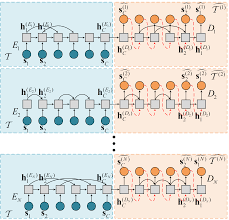




In [0]:
#X_AE=df.drop("Date",axis=1)

X_AE=df[df.columns[1:-1]] #create a data frame with just the constituents
scaled_X_AE=scaler.fit_transform(X_AE) #scale it in a min-max sense
Data=scaled_X_AE
Data=np.reshape(Data,(1,Data.shape[0],Data.shape[1])) #(1 training example with 2441 timesteps and 46 features)

model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(Data.shape[1],Data.shape[2]),return_sequences=True,name='Enc_1'))
#model.add(SimpleRNN(20, activation='relu', return_sequences=True,name='Enc_1_1'))
model.add(SimpleRNN(Data.shape[2], activation='relu', return_sequences=True,name='Dec_1'))
#model.add(TimeDistributed(Dense(Data.shape[2],kernel_regularizer='l2'),name='dec_1'))
model.compile(optimizer='rmsprop', loss='mse')

',patience=10,min_delta=0.01,'
hist=model.fit(Data,Data,epochs=1000,batch_size=1,callbacks=[EarlyStopping(monitor='loss',patience=20,restore_best_weights=True)])

model=Model(inputs=model.inputs, outputs=model.layers[1].output)
decoded_data=model.predict(Data)
decoded_data.shape

[31 13 22 44 32  2 21 17 45 35 14 25  7  1 42 46 18 43  5 10 38 24 34 29
 15 40 36 39  4 33 19  3 27 37 23  8  6 16 11 41 26 30 20 28  9 12]
[   432.88655976    471.01356639    515.84477029    609.66575499
    810.6911605     859.86144518   1034.78680938   1040.93522337
   1140.16156957   1229.88375059   1313.74052032   1381.90506389
   1449.19163878   1475.83120884   1499.66030276   1526.86471265
   1609.82782837   1713.9254984    1993.0577138    2059.61524317
   2146.46116253   2224.03802003   2514.73604908   2589.18444365
   2635.81083085   3000.72774126   3000.9349761    3147.21449284
   3938.53483462   3984.41322388   4145.17402247   4294.65347153
   4408.09364916   4504.20210452   4757.05278044   5459.68311829
   5896.86650363  10890.62341283  11498.23634793  13375.89303636
  24768.61101088  31525.9722365   40204.62578395  45206.83081855
  83694.95667605 102241.71727645]


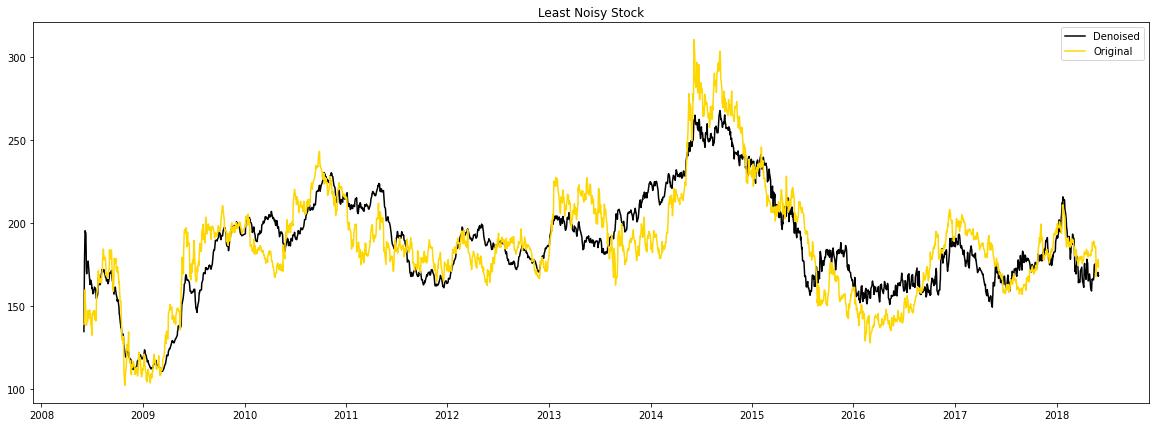

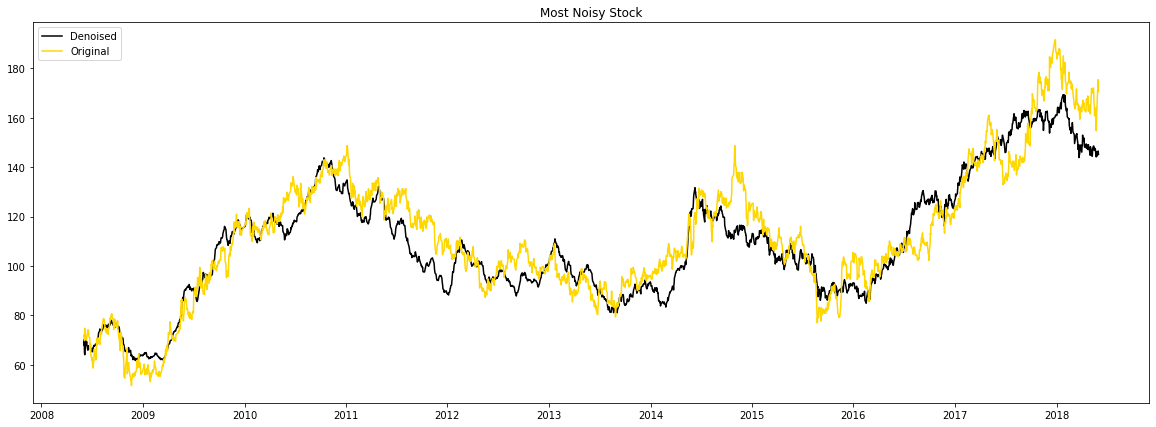

In [0]:
#Data=np.reshape(Data,(Data.shape[1],Data.shape[2]))
decoded_data=np.reshape(decoded_data,(Data.shape[0],Data.shape[1]))
d_1=scaler.inverse_transform(Data)
d_2=scaler.inverse_transform(decoded_data)
rep_data=d_2-d_1
sim=np.linalg.norm(rep_data,axis=0,ord=2)
ind=np.argsort(sim)+1
print(str(ind))
print(str(sim[ind-1]))

#CHECKPOINT: De-noised(Black) vs Original(gold)
plt.figure(figsize=(20,7))
plt.plot(df.index,d_2[:,ind[[0]]],'black',label='Denoised')
plt.plot(df.index,d_1[:,ind[[0]]],'gold',label='Original')
plt.title("Least Noisy Stock",loc='center')
plt.legend()
plt.show()
plt.figure(figsize=(20,7))
plt.plot(df.index,d_2[:,ind[[-1]]],'black',label='Denoised')
plt.plot(df.index,d_1[:,ind[[-1]]],'gold',label='Original')
plt.title("Most Noisy Stock",loc='center')
plt.legend()
plt.show()

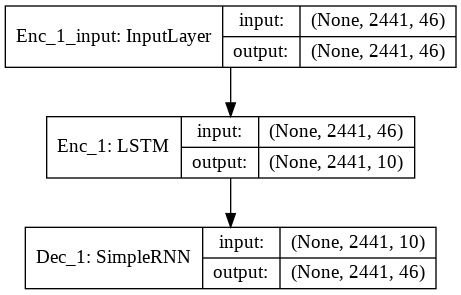

In [0]:
plot_model(model,show_shapes=True,show_layer_names=True,to_file='Model_LSTM_Autoencoder.png')

In [0]:
# The AutoEncoder model built using a feed forward Deep Neural Net
X_AE=df[df.columns[1:-1]]
scaled_X_AE=scaler.fit_transform(X_AE)
Data=scaled_X_AE
model_Deep = Sequential()
model_Deep.add(Dense(30, activation='tanh'))
model_Deep.add(Dense(2, activation='relu',name='Encoded'))
model_Deep.add(Dense(Data.shape[1], activation='relu',name='Decoded',kernel_regularizer='l2'))
model_Deep.compile(optimizer='rmsprop', loss='mse')
hist=model_Deep.fit(Data,Data,epochs=1000,batch_size=200,callbacks=[EarlyStopping(monitor='loss',patience=20,restore_best_weights=True)])

model_Deep=Model(inputs=model_Deep.inputs, outputs=model_Deep.layers[2].output)
decoded_data=model_Deep.predict(Data)
decoded_data.shape

[31 13 22 33 45  2 44 17 21 25 18 32  7 46 35  1 42  8 14 29 10  5 24 15
 43 38  3 36 26 34  4 39 40 20 19 23 37 27  6 28 16 41 11 30 12  9]
[  494.57507407   573.71563995   667.28542937   668.94731629
   988.78735954   996.7974231   1126.56354378  1131.29539352
  1305.14040957  1341.04541332  1544.84287817  1611.3695307
  1618.28481813  1619.31842675  1697.82090931  1800.29762032
  1961.90369504  1998.8717883   2026.42881804  2150.78944605
  2294.1227264   2314.99383278  2405.4009743   2590.89957252
  2708.62911481  2872.92082315  2978.43641661  3122.23693403
  3200.13808453  3272.17973587  3403.29385322  3534.57868145
  4159.37625847  4564.57217936  4728.26855557  4859.20827662
  5272.26384344  5554.82583165  5918.56156581  7707.30365576
 10276.1411427  11900.66713715 14950.54692065 29202.52679512
 80987.80866111 91051.81722544]


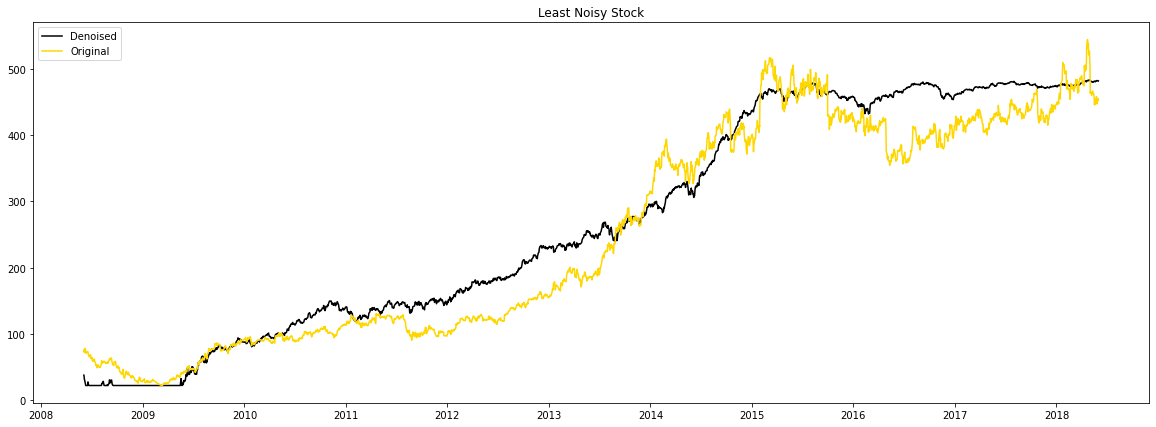

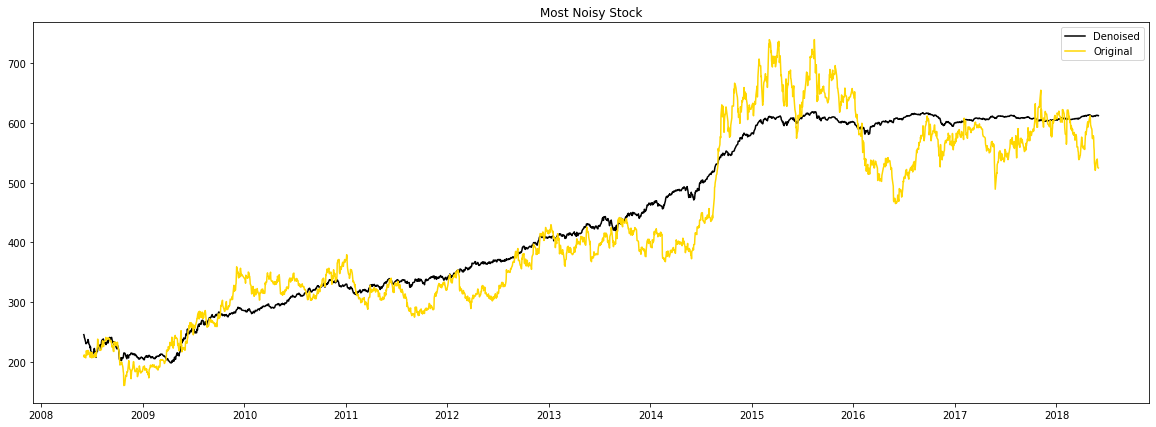

In [0]:
d_1=scaler.inverse_transform(Data)
d_2=scaler.inverse_transform(decoded_data)
rep_data=d_2-d_1
sim=np.linalg.norm(rep_data,axis=0,ord=2)
ind_Deep=np.argsort(sim)+1
print(str(ind))
print(str(sim[ind-1]))

#CHECKPOINT: De-noised(Black) vs Original(gold)
plt.figure(figsize=(20,7))
plt.plot(df.index,d_2[:,ind[[1]]],'black',label='Denoised')
plt.plot(df.index,d_1[:,ind[[1]]],'gold',label='Original')
plt.title("Least Noisy Stock",loc='center')
plt.legend()
plt.show()
plt.figure(figsize=(20,7))
plt.plot(df.index,d_2[:,ind[[-1]]],'black',label='Denoised')
plt.plot(df.index,d_1[:,ind[[-1]]],'gold',label='Original')
plt.title("Most Noisy Stock",loc='center')
plt.legend()
plt.show()

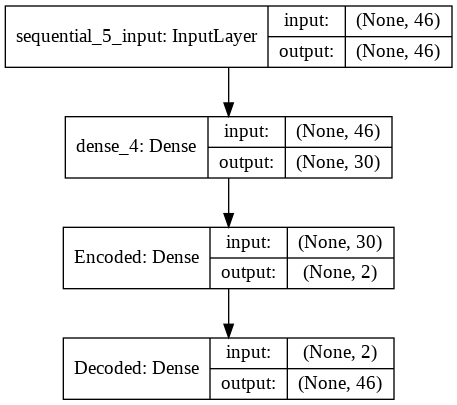

In [0]:
plot_model(model_Deep,show_shapes=True,show_layer_names=True)

At this point we have obtained the stocks in order of similarity to de-noised data,  ind(LSTM AutoEnc) ind_deep(Deep Net AutoEnc)

In [0]:
from sklearn.model_selection import train_test_split

Y=df["Price_51"]
Y=np.asarray(Y)

X=df[df.columns[ind[:20]]] 
X_deep=df[df.columns[ind_Deep[:20]]] 
X=scaler.fit_transform(X)
X_deep=scaler.fit_transform(X_deep)

Y=Y.reshape((Y.shape[0],1))
Y=scaler.fit_transform(Y)

https://roamanalytics.com/2016/11/28/shape-matching-with-time-series-data/


The following portion uses the LSTM based architecture to predict the performance of the tracker

Train on 1708 samples, validate on 733 samples
Epoch 1/100
1708/1708 [==============================] - 0s 260us/step - loss: 0.1351 - val_loss: 0.3813
Epoch 2/100
1708/1708 [==============================] - 0s 143us/step - loss: 0.0538 - val_loss: 0.1477
Epoch 3/100
1708/1708 [==============================] - 0s 146us/step - loss: 0.0071 - val_loss: 0.0200
Epoch 4/100
1708/1708 [==============================] - 0s 147us/step - loss: 0.0020 - val_loss: 0.0167
Epoch 5/100
1708/1708 [==============================] - 0s 150us/step - loss: 0.0017 - val_loss: 0.0117
Epoch 6/100
1708/1708 [==============================] - 0s 152us/step - loss: 0.0016 - val_loss: 0.0076
Epoch 7/100
1708/1708 [==============================] - 0s 146us/step - loss: 0.0015 - val_loss: 0.0125
Epoch 8/100
1708/1708 [==============================] - 0s 148us/step - loss: 0.0015 - val_loss: 0.0128
Epoch 9/100
1708/1708 [==============================] - 0s 153us/step - loss: 0.0014 - val_loss: 0.0083
Epoch 10

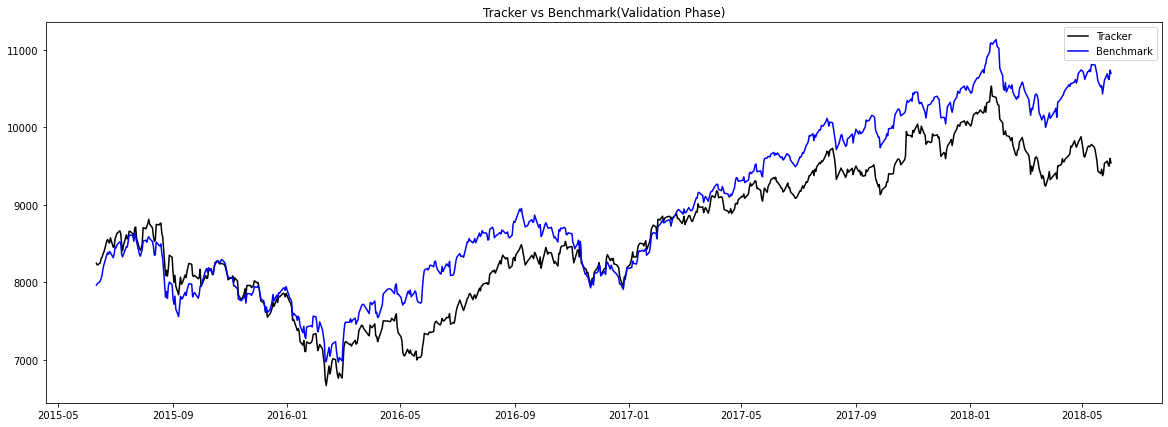

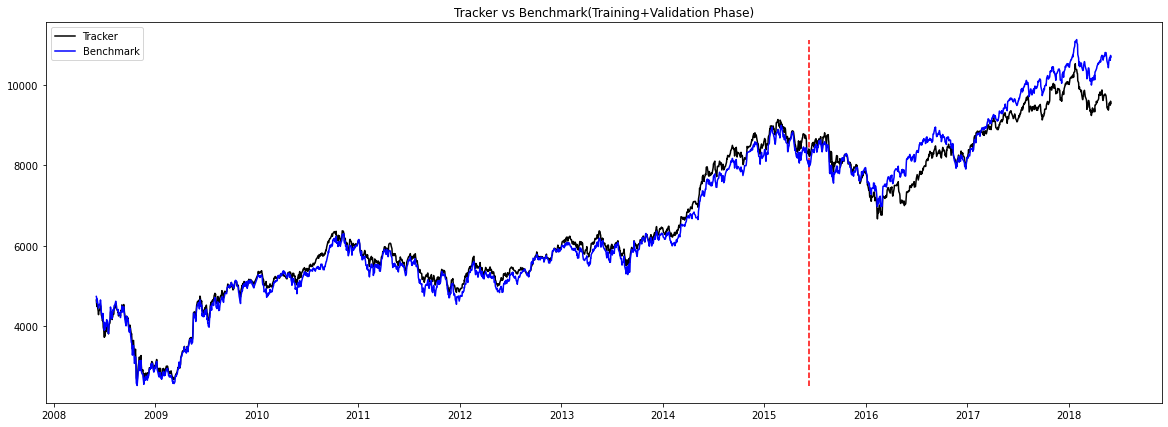

In [0]:
from tensorflow.keras import regularizers
import keras
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.30,shuffle=False)

X_train = np.reshape(X_train, (X_train.shape[0], X.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0], X.shape[1], 1))

model=Sequential()
model.add(SimpleRNN(100,activation='relu',input_shape=(X_train.shape[1],X_train.shape[2]),kernel_regularizer=regularizers.l1(1e-4)))
#model.add(TimeDistributed(Dropout(0.2)))
#model.add(SimpleRNN(50,activation='relu',input_shape=(X_train.shape[1], X_train.shape[2]),kernel_regularizer=regularizers.l1(1e-4)))
model.add(Dense(1))

#opt = keras.optimizers.Adam(learning_rate=0.001,decay=1e-5)
opt = keras.optimizers.RMSprop(learning_rate=0.0001)

model.compile(loss="mse",optimizer=opt)

history=model.fit(X_train, y_train, epochs=100
                  , batch_size=50, validation_data=(X_test,y_test),callbacks=[EarlyStopping(monitor='val_loss',patience=10,min_delta=0.0001,restore_best_weights=True)])
#model.summary()

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(y_test)
predicted=np.concatenate((train_predict,test_predict))

##tracker(black) vs benchmark(blue) in the testing phase
plt.figure(figsize=(20,7))
plt.plot(df.index[-Y_test.shape[0]:],test_predict,'black',label='Tracker')
plt.plot(df.index[-Y_test.shape[0]:],Y_test,'blue',label='Benchmark')
plt.title("Tracker vs Benchmark(Validation Phase)")
plt.legend()
plt.show()
plt.figure(figsize=(20,7))
plt.plot(df.index, predicted,'black',label='Tracker')
plt.plot(df.index, df["Price_51"], 'blue',label='Benchmark')
plt.title("Tracker vs Benchmark(Training+Validation Phase)")
plt.vlines(df.index[-y_test.shape[0]],np.min(df['Price_51']),np.max(df["Price_51"]),colors='red',linestyles='dashed')
plt.legend()
plt.show()

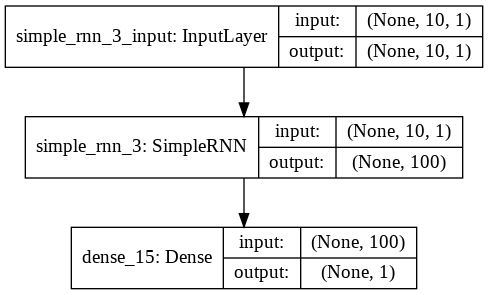

In [0]:
plot_model(model,show_shapes=True)

Now that the model has been built, we verify it's efficacy in the validation set by ploting both the benchmark as well as the tracker values

Train on 1708 samples, validate on 733 samples
Epoch 1/100
1708/1708 [==============================] - 0s 259us/step - loss: 0.0980 - val_loss: 0.2835
Epoch 2/100
1708/1708 [==============================] - 0s 150us/step - loss: 0.0260 - val_loss: 0.0373
Epoch 3/100
1708/1708 [==============================] - 0s 151us/step - loss: 0.0027 - val_loss: 0.0154
Epoch 4/100
1708/1708 [==============================] - 0s 144us/step - loss: 0.0017 - val_loss: 0.0089
Epoch 5/100
1708/1708 [==============================] - 0s 150us/step - loss: 0.0016 - val_loss: 0.0107
Epoch 6/100
1708/1708 [==============================] - 0s 145us/step - loss: 0.0015 - val_loss: 0.0096
Epoch 7/100
1708/1708 [==============================] - 0s 147us/step - loss: 0.0014 - val_loss: 0.0038
Epoch 8/100
1708/1708 [==============================] - 0s 149us/step - loss: 0.0014 - val_loss: 0.0078
Epoch 9/100
1708/1708 [==============================] - 0s 148us/step - loss: 0.0013 - val_loss: 0.0108
Epoch 10

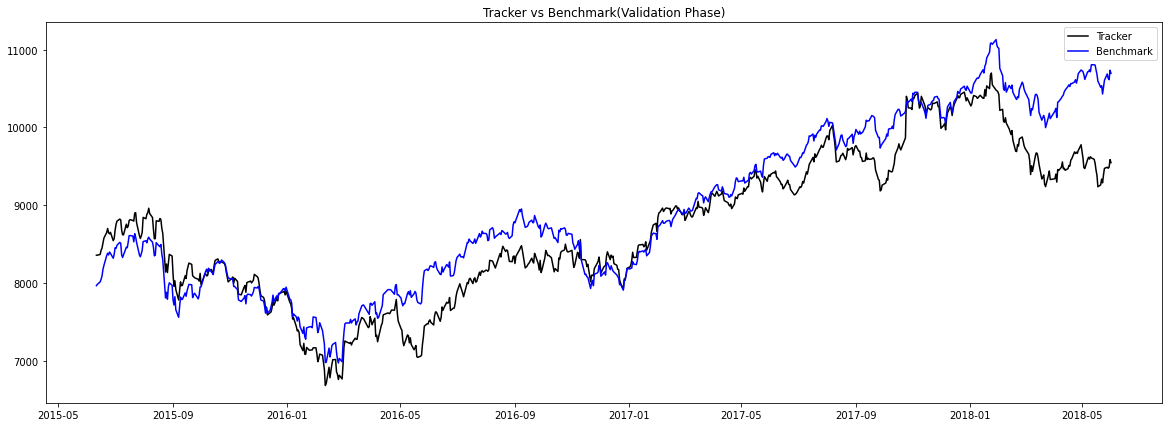

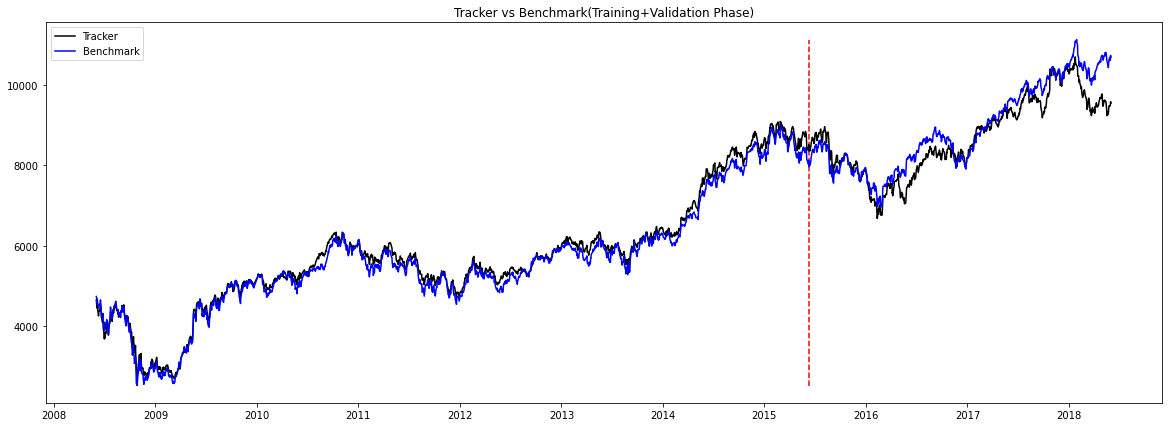

In [0]:
from tensorflow.keras import regularizers
import keras
X_train, X_test, y_train, y_test=train_test_split(X_deep,Y,test_size=0.30,shuffle=False)

X_train = np.reshape(X_train, (X_train.shape[0], X.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0], X.shape[1], 1))

model=Sequential()
model.add(SimpleRNN(100,activation='relu',input_shape=(X_train.shape[1],X_train.shape[2]),kernel_regularizer=regularizers.l1(1e-4)))
#model.add(TimeDistributed(Dropout(0.2)))
#model.add(SimpleRNN(50,activation='relu',input_shape=(X_train.shape[1], X_train.shape[2]),kernel_regularizer=regularizers.l1(1e-4)))
model.add(Dense(1))

#opt = keras.optimizers.Adam(learning_rate=0.001,decay=1e-5)
opt = keras.optimizers.RMSprop(learning_rate=0.0001)

model.compile(loss="mse",optimizer=opt)

history=model.fit(X_train, y_train, epochs=100
                  , batch_size=50, validation_data=(X_test,y_test),callbacks=[EarlyStopping(monitor='val_loss',patience=10,min_delta=0.0001,restore_best_weights=True)])
#model.summary()

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(y_test)
predicted=np.concatenate((train_predict,test_predict))
##tracker(black) vs benchmark(blue) in the testing phase
##tracker(black) vs benchmark(blue) in the testing phase
plt.figure(figsize=(20,7))
plt.plot(df.index[-Y_test.shape[0]:],test_predict,'black',label='Tracker')
plt.plot(df.index[-Y_test.shape[0]:],Y_test,'blue',label='Benchmark')
plt.title("Tracker vs Benchmark(Validation Phase)")
plt.legend()
plt.show()
plt.figure(figsize=(20,7))
plt.plot(df.index, predicted,'black',label='Tracker')
plt.plot(df.index, df["Price_51"], 'blue',label='Benchmark')
plt.title("Tracker vs Benchmark(Training+Validation Phase)")
plt.vlines(df.index[-y_test.shape[0]],np.min(df['Price_51']),np.max(df["Price_51"]),colors='red',linestyles='dashed')
plt.legend()
plt.show()

Now that I have obtained my predicted time series, I intend to use one of the similarity measures proposed by Mori et al. with their respctive implementation in the **TSDist** library in R.   

In [0]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr

base=importr('base')
stats=importr('stats')
ro.r('install.packages("TSdist")')

In [0]:
TSDist=importr('TSdist')

In [0]:
predicted=np.reshape(predicted,(predicted.shape[0],))
p=pd.Series(predicted,copy=True)
tracker=base.as_numeric(predicted.tolist())
benchmark=base.as_numeric(df["Price_51"].tolist())
dist=TSDist.CCorDistance(tracker, benchmark)
dist

0.004489
